# NOVARTIS DATA SCIENCE HIRING CHALLENGE

Attempting the Novartis Data Science Hiring Challenge : https://www.hackerearth.com/challenges/hiring/novartis-data-science-hiring-challenge/

## Importing Libraries and Datasets

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

In [2]:
train = pd.read_csv("./Dataset/Train.csv")
train.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,CR_102659,04-JUL-04,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0
1,CR_189752,18-JUL-17,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1
2,CR_184637,15-MAR-17,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1
3,CR_139071,13-FEB-09,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1
4,CR_109335,13-APR-05,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1


In [3]:
test = pd.read_csv("./Dataset/Test.csv")
test.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
0,CR_195453,01-FEB-18,0,30,35,7,3,6,4,0,5,1,174,NaN,72,119,23
1,CR_103520,05-MAR-04,0,44,44,1,3,7,1,4,6,1,316,0.0,12,29,34
2,CR_196089,27-JAN-18,0,34,33,3,5,2,7,3,0,1,316,1.0,72,0,34
3,CR_112195,18-AUG-06,7,3,2,3,5,9,8,0,5,1,174,1.0,112,87,34
4,CR_149832,31-OCT-11,0,7,8,7,3,2,7,1,5,1,174,0.0,112,93,43


## Exploratory Data Analysis

In [4]:
train.describe()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
count,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23674.000000,23856.000000,23856.000000,23856.000000,23856.000000
mean,0.483778,24.791206,24.637450,4.276744,2.455609,6.154175,4.876509,0.972460,4.924128,1.244802,206.954519,0.974064,85.237383,72.674296,33.464747,0.955231
std,1.439738,15.240231,15.135093,2.944672,1.963095,4.471756,3.881931,1.453144,1.362625,1.119301,93.033348,1.167725,27.597226,43.297320,8.386834,0.206800
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,7.000000,8.000000,2.000000,1.000000,3.000000,2.000000,0.000000,5.000000,1.000000,174.000000,1.000000,72.000000,29.000000,34.000000,1.000000
50%,0.000000,24.000000,24.000000,4.000000,3.000000,5.000000,4.000000,1.000000,5.000000,1.000000,249.000000,1.000000,98.000000,62.000000,34.000000,1.000000
75%,0.000000,36.000000,35.000000,6.000000,5.000000,8.000000,7.000000,1.000000,6.000000,1.000000,249.000000,1.000000,103.000000,107.000000,34.000000,1.000000
max,7.000000,52.000000,52.000000,10.000000,5.000000,19.000000,18.000000,99.000000,6.000000,90.000000,332.000000,90.000000,116.000000,142.000000,50.000000,1.000000


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Data columns (total 18 columns):
INCIDENT_ID         23856 non-null object
DATE                23856 non-null object
X_1                 23856 non-null int64
X_2                 23856 non-null int64
X_3                 23856 non-null int64
X_4                 23856 non-null int64
X_5                 23856 non-null int64
X_6                 23856 non-null int64
X_7                 23856 non-null int64
X_8                 23856 non-null int64
X_9                 23856 non-null int64
X_10                23856 non-null int64
X_11                23856 non-null int64
X_12                23674 non-null float64
X_13                23856 non-null int64
X_14                23856 non-null int64
X_15                23856 non-null int64
MULTIPLE_OFFENSE    23856 non-null int64
dtypes: float64(1), int64(15), object(2)
memory usage: 3.3+ MB


## Filling missing values

In [6]:
train['X_12'].fillna((train['X_12'].mean()), inplace=True)
test['X_12'].fillna((test['X_12'].mean()), inplace=True)

In [7]:
train.isnull().sum()

INCIDENT_ID         0
DATE                0
X_1                 0
X_2                 0
X_3                 0
X_4                 0
X_5                 0
X_6                 0
X_7                 0
X_8                 0
X_9                 0
X_10                0
X_11                0
X_12                0
X_13                0
X_14                0
X_15                0
MULTIPLE_OFFENSE    0
dtype: int64

## Feature Engineering

In [8]:
train['WEEKDAY'] = pd.to_datetime(train['DATE']).dt.dayofweek
test['WEEKDAY'] = pd.to_datetime(test['DATE']).dt.dayofweek

train['IsWeekend'] = 0
train.loc[train['WEEKDAY'].isin([5, 6]), 'IsWeekend'] = 1

test['IsWeekend'] = 0
test.loc[train['WEEKDAY'].isin([5, 6]), 'IsWeekend'] = 1

In [9]:
train.drop('DATE', axis=1, inplace=True)
test.drop('DATE', axis=1, inplace=True)

train['INCIDENT_ID'].head()

0    CR_102659
1    CR_189752
2    CR_184637
3    CR_139071
4    CR_109335
Name: INCIDENT_ID, dtype: object

In [10]:
train['INCIDENT_ID'] =train.INCIDENT_ID.str.slice(3, 9)
test['INCIDENT_ID'] =test.INCIDENT_ID.str.slice(3, 9)

In [11]:
train.head()

,INCIDENT_ID,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE,WEEKDAY,IsWeekend
0,102659,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0,6,1
1,189752,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1,1,0
2,184637,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1,2,0
3,139071,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1,4,0
4,109335,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1,2,0


In [12]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Frequency')

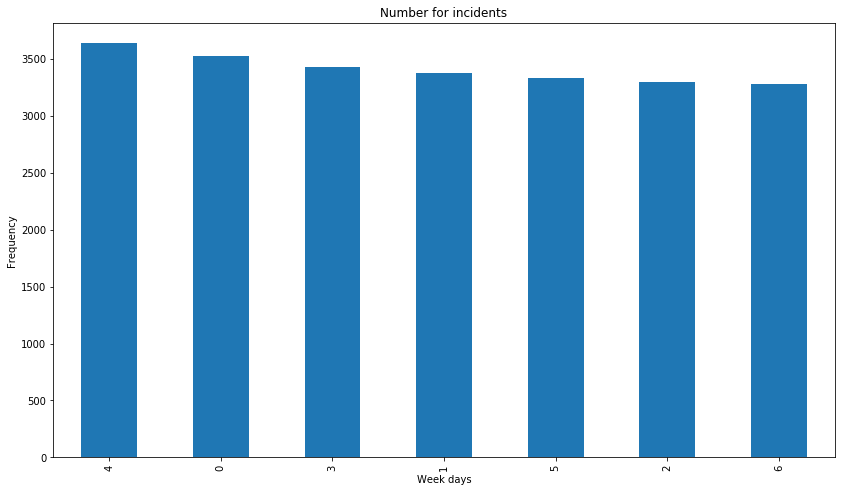

In [13]:
ax = train['WEEKDAY'].value_counts().plot(kind = 'bar',
                                          figsize = (14, 8),
                                          title = "Number for incidents")
ax.set_xlabel("Week days")
ax.set_ylabel("Frequency")

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Data columns (total 19 columns):
INCIDENT_ID         23856 non-null object
X_1                 23856 non-null int64
X_2                 23856 non-null int64
X_3                 23856 non-null int64
X_4                 23856 non-null int64
X_5                 23856 non-null int64
X_6                 23856 non-null int64
X_7                 23856 non-null int64
X_8                 23856 non-null int64
X_9                 23856 non-null int64
X_10                23856 non-null int64
X_11                23856 non-null int64
X_12                23856 non-null float64
X_13                23856 non-null int64
X_14                23856 non-null int64
X_15                23856 non-null int64
MULTIPLE_OFFENSE    23856 non-null int64
WEEKDAY             23856 non-null int64
IsWeekend           23856 non-null int64
dtypes: float64(1), int64(17), object(1)
memory usage: 3.5+ MB


In [15]:
test.isnull().sum()

INCIDENT_ID    0
X_1            0
X_2            0
X_3            0
X_4            0
X_5            0
X_6            0
X_7            0
X_8            0
X_9            0
X_10           0
X_11           0
X_12           0
X_13           0
X_14           0
X_15           0
WEEKDAY        0
IsWeekend      0
dtype: int64

In [16]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(train, train_size = 0.7, test_size = 0.3, random_state = 100)

## Feature selection

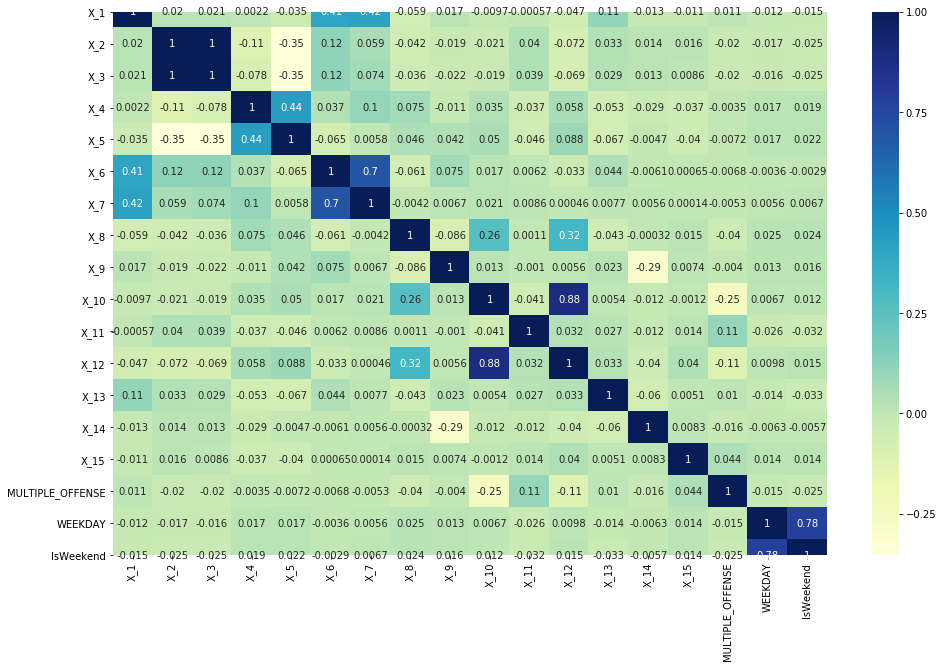

In [17]:
import seaborn as sns

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap = "YlGnBu")

plt.show()

# Data modelling for predictions

## Splitting data into X and Y variable

In [18]:
y_train = df_train.pop('MULTIPLE_OFFENSE')
X_train = df_train

X_test= df_test.drop('MULTIPLE_OFFENSE', axis = 1)
y_test= df_test['MULTIPLE_OFFENSE']

## Importing more modules for modeling

In [19]:
from sklearn.metrics import mean_absolute_error
import sklearn.metrics as metrics
import math
from sklearn.model_selection import train_test_split
from geopy.distance import vincenty
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import xgboost as xgb
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#### Decision Tree

In [20]:
# Decision Tree Model

dtr_model = DecisionTreeRegressor()
dtr_model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [21]:
print(X_train.head())
print(dtr_model.predict(X_train.head()))

      INCIDENT_ID  X_1  X_2  X_3  X_4  X_5  X_6  X_7  X_8  X_9  X_10  X_11  \
4591        61461    0   33   32    2    1    6    4    0    5     1   174   
17773      109300    0   33   32    2    1    5    6    0    5     1   174   
10239      193279    0    7    8    7    3    2    7    1    2     1   249   
12148       58475    0    4    4    6    5    2    7    0    5     1   174   
19923       39791    0   40   40    2    1    5    6    2    6     1   174   

       X_12  X_13  X_14  X_15  WEEKDAY  IsWeekend  
4591    0.0    98    62    43        4          0  
17773   0.0    92    93    43        6          1  
10239   1.0    67   140    34        2          0  
12148   1.0    72    93    34        3          0  
19923   1.0    72    93    34        0          0  
[1. 1. 1. 1. 1.]


In [22]:
# Decision Tree results

y_hat = dtr_model.predict(X_train)
mae = metrics.mean_absolute_error(y_train,y_hat)
mse = metrics.mean_squared_error(y_train,y_hat)

print ("MAE:", mae)
print ("RMSE:", math.sqrt(mse))
print ("r2:", dtr_model.score(X_train,y_train))
print ("n_features:", dtr_model.n_features_)
print ("n_outputs:", dtr_model.n_outputs_)

MAE: 0.0
RMSE: 0.0
r2: 1.0
n_features: 18
n_outputs: 1


In [23]:
# Test data results for Decision Tree

y_hat = dtr_model.predict(X_test)
mae = metrics.mean_absolute_error(y_test,y_hat)
mse = metrics.mean_squared_error(y_test,y_hat)

print ("MAE:", mae)
print ("RMSE:", math.sqrt(mse))
print ("r2:", dtr_model.score(X_test,y_test))

MAE: 0.0022355735643426015
RMSE: 0.04728185237850355
r2: 0.9465439749936047


#### Random Forest

In [24]:
# Random forest with default parameters.

rfc = RandomForestClassifier()

In [25]:
rfc.fit(X_train,y_train)
predictions = rfc.predict(X_test)

In [26]:
# Default Random Forest Classifier results
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.92      0.83      0.87       313
           1       0.99      1.00      0.99      6844

    accuracy                           0.99      7157
   macro avg       0.96      0.91      0.93      7157
weighted avg       0.99      0.99      0.99      7157



#### Grid Search

In [27]:
# Parameter grid from random search 

param_grid = {'max_depth': [4,8,10],
              'min_samples_leaf': range(100, 400, 200),
              'min_samples_split': range(200, 500, 200),
              'n_estimators': [100,200, 300],
              'max_features': [5, 10]}

# Grid search model

rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,
                           cv = 3, n_jobs = -1, verbose = 1)

In [28]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   46.1s
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:   55.3s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [29]:
print('Score: ',grid_search.best_score_)
print('Parameters: ',grid_search.best_params_)

Score:  0.9747889095155399
Parameters:  {'max_depth': 8, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 200}


In [30]:
rfcModel = RandomForestClassifier(bootstrap=True, max_depth = 4,
                                  min_samples_leaf = 100, min_samples_split = 200,
                                  max_features = 10, n_estimators = 300)

In [31]:
rfcModel.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=4, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [32]:
predictions = rfcModel.predict(X_test)

In [33]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      0.46      0.62       313
           1       0.98      1.00      0.99      6844

    accuracy                           0.97      7157
   macro avg       0.96      0.73      0.80      7157
weighted avg       0.97      0.97      0.97      7157



In [34]:
X_train['INCIDENT_ID'] = X_train['INCIDENT_ID'].astype(int)
X_test['INCIDENT_ID'] = X_test['INCIDENT_ID'].astype(int)

#### XGBoost

In [35]:
# XGBoost Model

xgbModel = xgb.XGBClassifier()
xgbModel.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [36]:
y_pred = xgbModel.predict(X_test)

In [37]:
predictions = [round(value) for value in y_pred]

In [38]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: ",(accuracy * 100.0))

Accuracy:  99.88822132178286


In [39]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       313
           1       1.00      1.00      1.00      6844

    accuracy                           1.00      7157
   macro avg       0.99      0.99      0.99      7157
weighted avg       1.00      1.00      1.00      7157



In [40]:
test['INCIDENT_ID'] = test['INCIDENT_ID'].astype(int)

## Final Modelling

In [43]:
rfc_model_copy = test.copy()

In [44]:
rfc_model_copy['MULTIPLE_OFFENSE'] = xgbModel.predict(rfc_model_copy)

In [45]:
rfc_model_copy['INCIDENT_ID'] = 'CR_' + rfc_model_copy['INCIDENT_ID'].astype(str)
rfc_model_copy.head()

,INCIDENT_ID,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,WEEKDAY,IsWeekend,MULTIPLE_OFFENSE
0,CR_195453,0,30,35,7,3,6,4,0,5,1,174,0.972236,72,119,23,3,1,1
1,CR_103520,0,44,44,1,3,7,1,4,6,1,316,0.000000,12,29,34,4,0,1
2,CR_196089,0,34,33,3,5,2,7,3,0,1,316,1.000000,72,0,34,5,0,1
3,CR_112195,7,3,2,3,5,9,8,0,5,1,174,1.000000,112,87,34,4,0,1
4,CR_149832,0,7,8,7,3,2,7,1,5,1,174,0.000000,112,93,43,0,0,1


In [46]:
rfc_model_df_results = rfc_model_copy[['INCIDENT_ID','MULTIPLE_OFFENSE']]

## Generating Solution

In [47]:
rfc_model_df_results.to_csv('submission.csv',index=False)